<a href="https://colab.research.google.com/github/tusharsachan15/PERCEPTION_LAB/blob/main/lab3_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure

In [ ]:
def global_histogram_equalization(img):
   return cv2.equalizeHist(img)

In [ ]:
 # Create an empty array for the output image
def local_histogram_equalization(img, kernel_size=15):
  local_eq = np.zeros_like(img)
  half_k = kernel_size// 2
  rows,cols =img.shape
   # Apply local histogram equalization
  for i in range(rows):
    for j in range(cols):
        x1 = max(i - half_k, 0)
        x2 = min(i + half_k + 1, rows)
        y1 = max(j - half_k, 0)
        y2 = min(j + half_k + 1, cols)
        local_region = img[x1:x2, y1:y2]

        local_hist_eq = cv2.equalizeHist(local_region)

        # Calculate the local equalized pixel value
        local_eq[i, j] = local_hist_eq[half_k, half_k]

  return local_eq

In [ ]:
def adaptive_histogram_equalization(img, clip_limit=0.03):
 ad_eq = exposure.equalize_adapthist(img, clip_limit=clip_limit)
 return (ad_eq * 255).astype(np.uint8)


In [ ]:
def contrast_limited_histogram_equalization(img, clip_limit=0.03, tile_grid_size=(8, 8)):
 clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
 return clahe.apply(img)

In [ ]:
# Load the grayscale image
image_path = '/content/lab2.jpg' # Replace with your image path
img = cv2.imread(r"/content/lab2.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
 print(f"Error: Unable to load image at {image_path}")
 exit()

In [ ]:
# Apply different histogram equalization techniques
global_eq = global_histogram_equalization(img)

local_eq = local_histogram_equalization(img)

adaptive_eq = adaptive_histogram_equalization(img)

clahe_eq = contrast_limited_histogram_equalization(img)

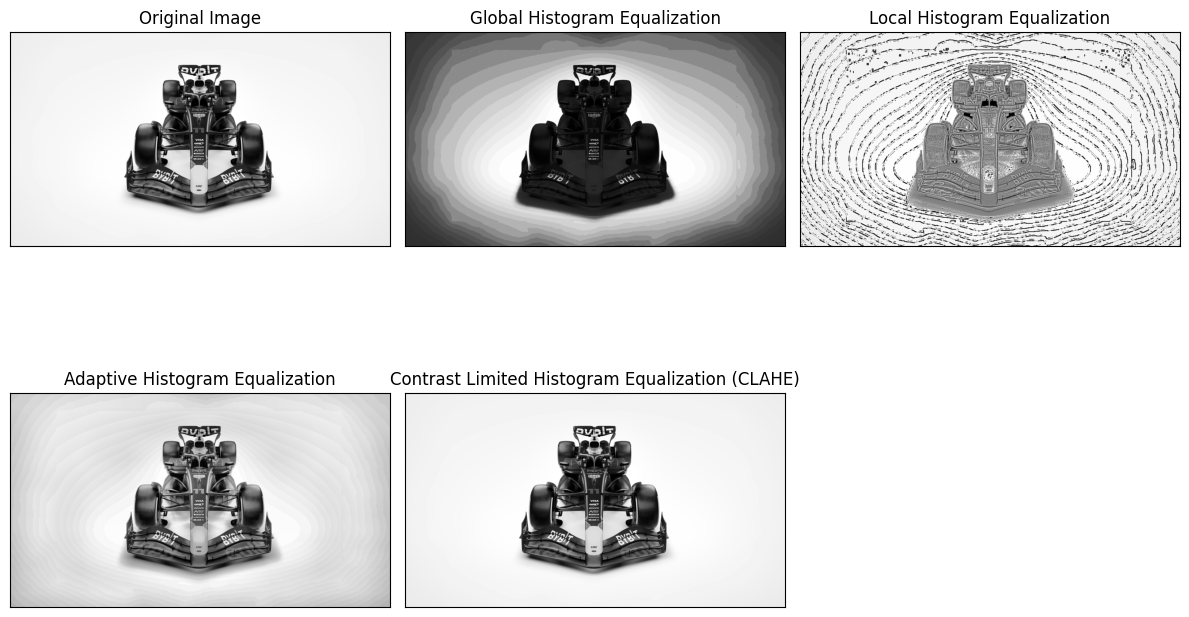

In [ ]:
# Display images
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(global_eq, cmap='gray')
plt.title('Global Histogram Equalization'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(local_eq, cmap='gray')
plt.title('Local Histogram Equalization'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(adaptive_eq, cmap='gray')
plt.title('Adaptive Histogram Equalization'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(clahe_eq, cmap='gray')
plt.title('Contrast Limited Histogram Equalization (CLAHE)'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()